this was last tested against this  version [sb-nb1](https://github.com/nocturnalastro/astropy/pull/1/commits/ab087b226988b101daa16e9b23ac0cc9e2658e41)

** TODO **
* write naritive

In [1]:
import numpy as np
from astropy.modeling.models import Gaussian1D
from itertools import cycle
from astropy.modeling.astro_sherpa import SherpaFitter
from sherpa.stats import Chi2
from collections import  defaultdict
%pylab inline
from itertools import cycle
np.random.seed(0x1337)


Populating the interactive namespace from numpy and matplotlib


Lets define a simple model to fit and and some data to fit it with

In [2]:
model = Gaussian1D(amplitude=5, mean=0.9, stddev=0.53)
err = 0.6
x = np.arange(-3, 3, .1)
y=model(x)+err*np.random.uniform(-1,1,size=len(x))
yerrs=err * np.random.uniform(0.5,1,size=len(x))
xerrs=np.ones(yerrs.shape)*0.05
true=model.copy()
model.amplitude = 2
model.mean = 0.5
model.stddev = 0.2

Lets define the fitter with the Chi<sup>2</sup> statistic as errorbars are good.
The first parameter to tested is the fixing of parameters so we fix the amplitude and fit
For conparison we will also fit without fixing the amplitude.

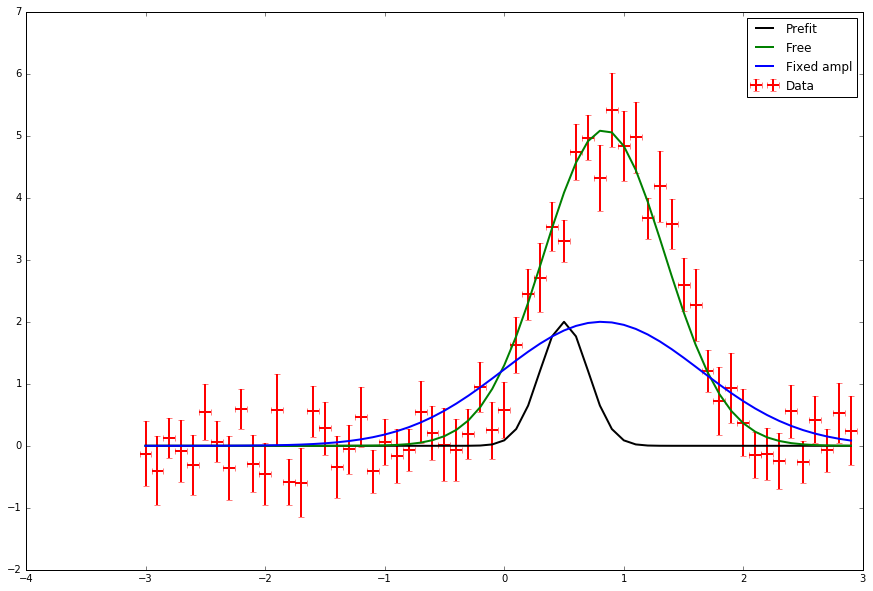

In [3]:
plt.rcParams['figure.figsize']=(15,10)

sfit=SherpaFitter(statistic=Chi2())
model.amplitude.fixed=True

fitmodels = sfit(model, x, y,yerr=yerrs,xerr=xerrs)
freefit = sfit(true.copy(), x, y,yerr=yerrs,xerr=xerrs)

plt.errorbar(x, y, label="Data", c='r',yerr=yerrs,xerr=xerrs,ls="",lw=2)

plt.plot(x, model(x), lw=2, label="Prefit", c="k")
plt.plot(x, freefit(x),lw=2, label="Free",c="g")
plt.plot(x,fitmodels(x),label="Fixed ampl",lw=2)
plt.legend()


Next we free the amplitude and set the upper bound(max value) of the mean we also shit the mean so that it's to otherside of the upper bound

In [4]:
model.amplitude.fixed=False
model.mean.value=0
model.mean.max=0.2

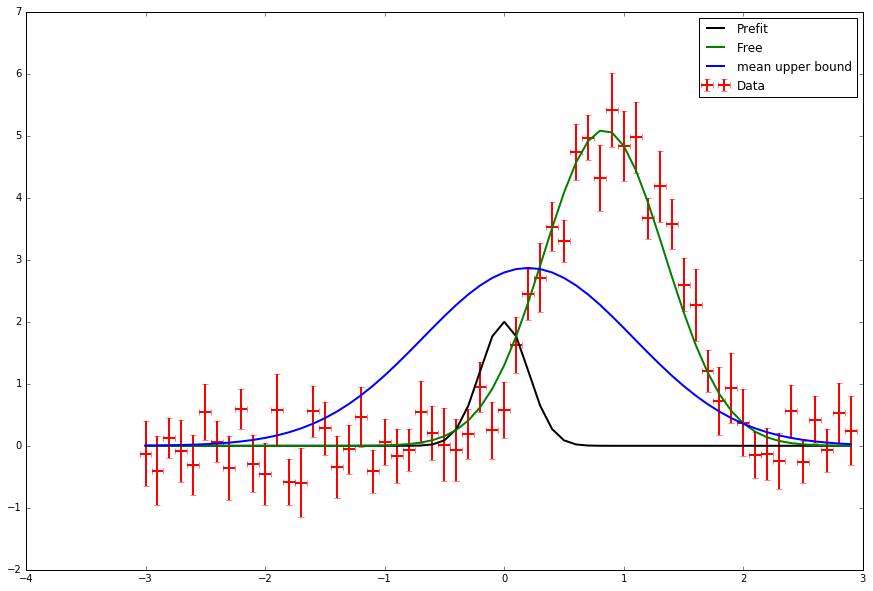

In [5]:
fitmodels = sfit(model, x, y,yerr=yerrs,xerr=xerrs)
freefit =sfit(true, x, y,yerr=yerrs,xerr=xerrs)

plt.errorbar(x, y, label="Data", c='r',yerr=yerrs,xerr=xerrs,ls="",lw=2)
plt.plot(x, model(x), lw=2, label="Prefit", c="k")
plt.plot(x, freefit(x),lw=2, label="Free",c="g")
plt.plot(x,fitmodels(x),label="mean upper bound",lw=2)
plt.legend()

The final thing to do is test the tying of parameters so we will tie the two parameters together using tiedfunc.

Model: CompoundModel0
Inputs: (u'x',)
Outputs: (u'y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=5.0, mean=0.9, stddev=0.53, name='')>

    [1]: <Gaussian1D(amplitude=5.0, mean=0.9, stddev=0.53, name='')>
Parameters:
    amplitude_0 mean_0 stddev_0 amplitude_1 mean_1 stddev_1
    ----------- ------ -------- ----------- ------ --------
            2.0   -1.5     0.53         5.0    0.9     0.53

   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   wrap_.amplitude_0 thawed      3.31624 -3.40282e+38  3.40282e+38           
   wrap_.mean_0 thawed     -1.69274 -3.40282e+38  3.40282e+38           
   wrap_.stddev_0 thawed     0.341494 -3.40282e+38  3.40282e+38           
   wrap_.amplitude_1 linked      3.97948 expr: (1.2 * wrap_.amplitude_0)           
   wrap_.mean_1 thawed     0.845058 -3.40282e+38  3.40282e+38           
   wrap_.stddev_1 thawed     0.

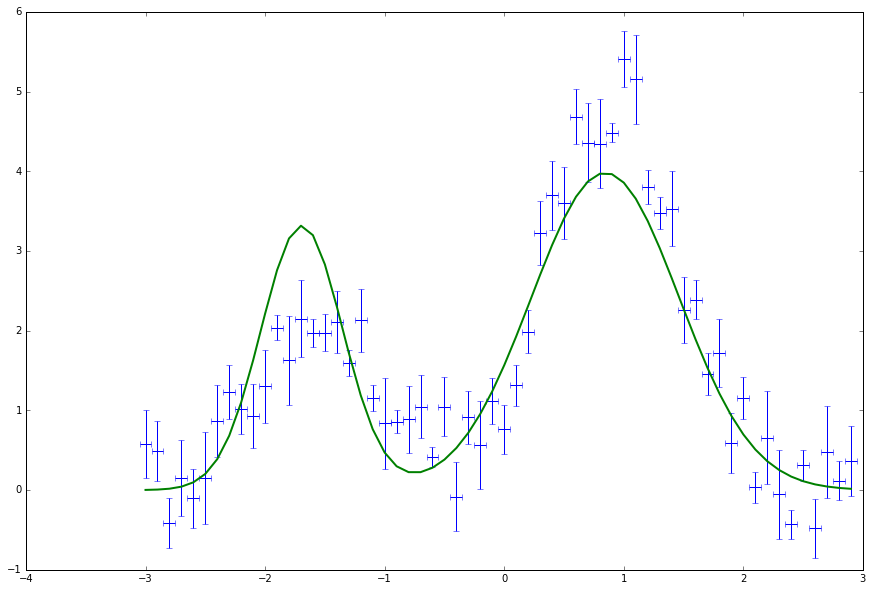

In [6]:
model2=true+true

def tiedfunc(self):
    return 1.2*self.amplitude_0

model2.amplitude_1.tied=tiedfunc
model2.amplitude_0.value=2
model2.mean_0.value=-1.5
print model2

err = 0.6
yy=model2(x)+err*np.random.uniform(-1,1,size=len(x))
yyerrs=err * np.random.uniform(0.2,1,size=len(x))
xxerrs=np.ones(yyerrs.shape)*0.05

plt.errorbar(x,yy,yerr=yyerrs,xerr=xxerrs,ls="")
fitmodels = sfit(model2, x, yy,yerr=yyerrs,xerr=xxerrs)
plt.plot(x,fitmodels(x),label="tied amplitude",lw=2)
print(sfit._fitmodel)